<center><img src="https://images.ctfassets.net/81iqaqpfd8fy/3Wp4SEgzagcICaSqcIMOQM/5721655abf93a19521dad8a35d747f2d/Erupting_Volcano.jpg?h=620&w=1024"></center>
<h1><center>INGV - Volcanic Eruption Prediction</center></h1>
<h1><center>Sensor Data Analysis for Predicting on Volcano Eruption </center></h1>

In [92]:
#for data analysis
import numpy as np  #numpy is for numerical computing that provides support for arrays and matrices
import pandas as pd #pandas is for data manipulation and analysis(grouping, filtering and aggregating data)
import glob #glob is for finding files and directories that match a specified pattern
from tqdm import tqdm #tqdm provides progress bars for long-running processes

import datetime

#for interactive data visulizations
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

#for visualization
import seaborn as sns #seaborn is for creating statistical graphics
import matplotlib.pyplot as plt #matplotlib is for creating static visualizations
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1. Data Checking

## Checking the number of Files

In [93]:
#putting star at the end to import all files from the path
train_csvs = glob.glob("../input/predict-volcanic-eruptions-ingv-oe/train/*")
len(train_csvs)

4431

In [94]:
test_csvs = glob.glob("../input/predict-volcanic-eruptions-ingv-oe/test/*")
len(test_csvs)

4520

## Train.csv Check

In [95]:
train = pd.read_csv("../input/predict-volcanic-eruptions-ingv-oe/train.csv")
train

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429
...,...,...
4426,873340274,15695097
4427,1297437712,35659379
4428,694853998,31206935
4429,1886987043,9598270


In [96]:
len(train)

4431

## Sample Submission Check

In [97]:
sample_submission = pd.read_csv('../input/predict-volcanic-eruptions-ingv-oe/sample_submission.csv')
sample_submission

,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0
...,...,...
4515,996704281,0
4516,997630809,0
4517,998072137,0
4518,998136924,0


In [98]:
len(sample_submission)

4520

## Train segment_id Check

In [99]:
train_csvs[0]

'../input/predict-volcanic-eruptions-ingv-oe/train/800654756.csv'

In [100]:
sequence = pd.read_csv(train_csvs[0])
sequence

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,-560.0,-508.0,NaN,-261.0,-348.0,1681.0,-764.0,-1193.0,NaN,-516.0
1,-508.0,-460.0,NaN,-276.0,-252.0,1934.0,-774.0,-1276.0,NaN,-537.0
2,-630.0,-260.0,NaN,-310.0,-174.0,2229.0,-785.0,-1298.0,NaN,-535.0
3,-587.0,1.0,NaN,-352.0,-69.0,2069.0,-788.0,-1249.0,NaN,-507.0
4,-778.0,240.0,NaN,-390.0,71.0,1850.0,-825.0,-1402.0,NaN,-437.0
...,...,...,...,...,...,...,...,...,...,...
59996,232.0,-151.0,NaN,-192.0,126.0,-1189.0,-578.0,1592.0,NaN,232.0
59997,154.0,-119.0,NaN,-230.0,105.0,-942.0,-766.0,942.0,NaN,208.0
59998,376.0,-67.0,NaN,-285.0,25.0,-747.0,-958.0,559.0,NaN,265.0
59999,289.0,-97.0,NaN,-348.0,-3.0,-302.0,-984.0,363.0,NaN,303.0


In [101]:
#getting statistics of csv file
sequence.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
count,60001.000000,60001.000000,0.0,60001.000000,60001.00000,60001.000000,60001.000000,60001.000000,0.0,60001.000000
mean,4.114265,3.180480,NaN,3.713188,-0.39236,-27.230496,-6.301845,-4.175564,NaN,8.997183
std,470.544946,1045.166153,NaN,469.713393,311.32671,1705.378236,541.081700,901.290059,NaN,927.946272
min,-3891.000000,-28726.000000,NaN,-5282.000000,-7223.00000,-6189.000000,-2455.000000,-4704.000000,NaN,-10709.000000
25%,-273.000000,-248.000000,NaN,-246.000000,-109.00000,-1197.000000,-345.000000,-600.000000,NaN,-473.000000
50%,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,0.000000
75%,286.000000,257.000000,NaN,250.000000,107.00000,1143.000000,337.000000,600.000000,NaN,487.000000
max,4065.000000,32767.000000,NaN,5610.000000,7244.00000,6149.000000,2268.000000,4789.000000,NaN,10389.000000


## Sensor Value Check

In [102]:
import matplotlib.pyplot as plt

def show_sensors(df):
    f, axes = plt.subplots(10, 1)
    f.set_size_inches((16, 10)) 
    f.tight_layout()
    plt.subplots_adjust(bottom=-0.4)
    
    # Sensor #1 ~ #10
    for i in range(1,11):
        axes[i-1].plot(df[f'sensor_{i}'].values)
        axes[i-1].set_title('Sensor_'+str(i))
        axes[i-1].set_xlabel('time')

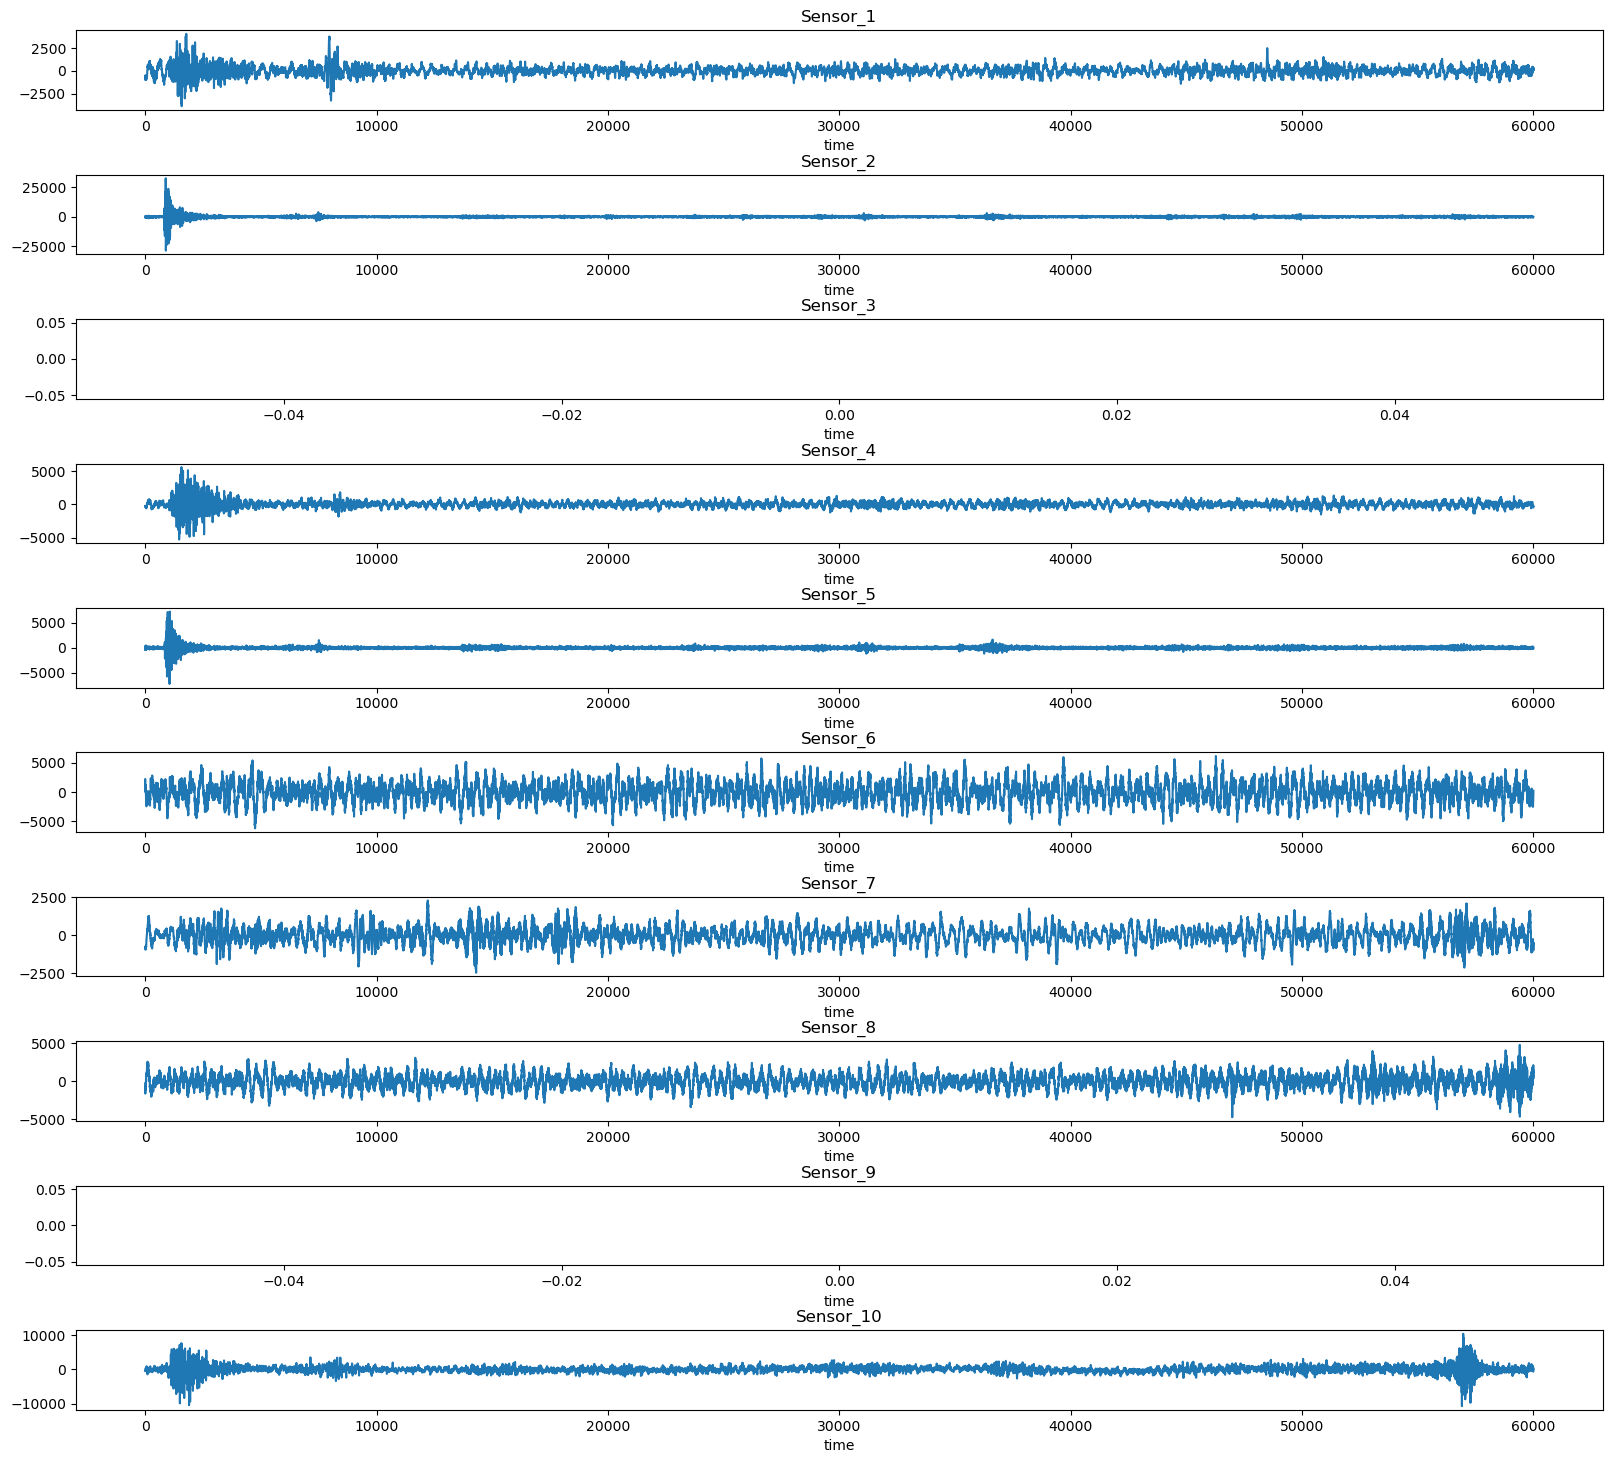

In [103]:
#note the the vertical range is different 
show_sensors(sequence)

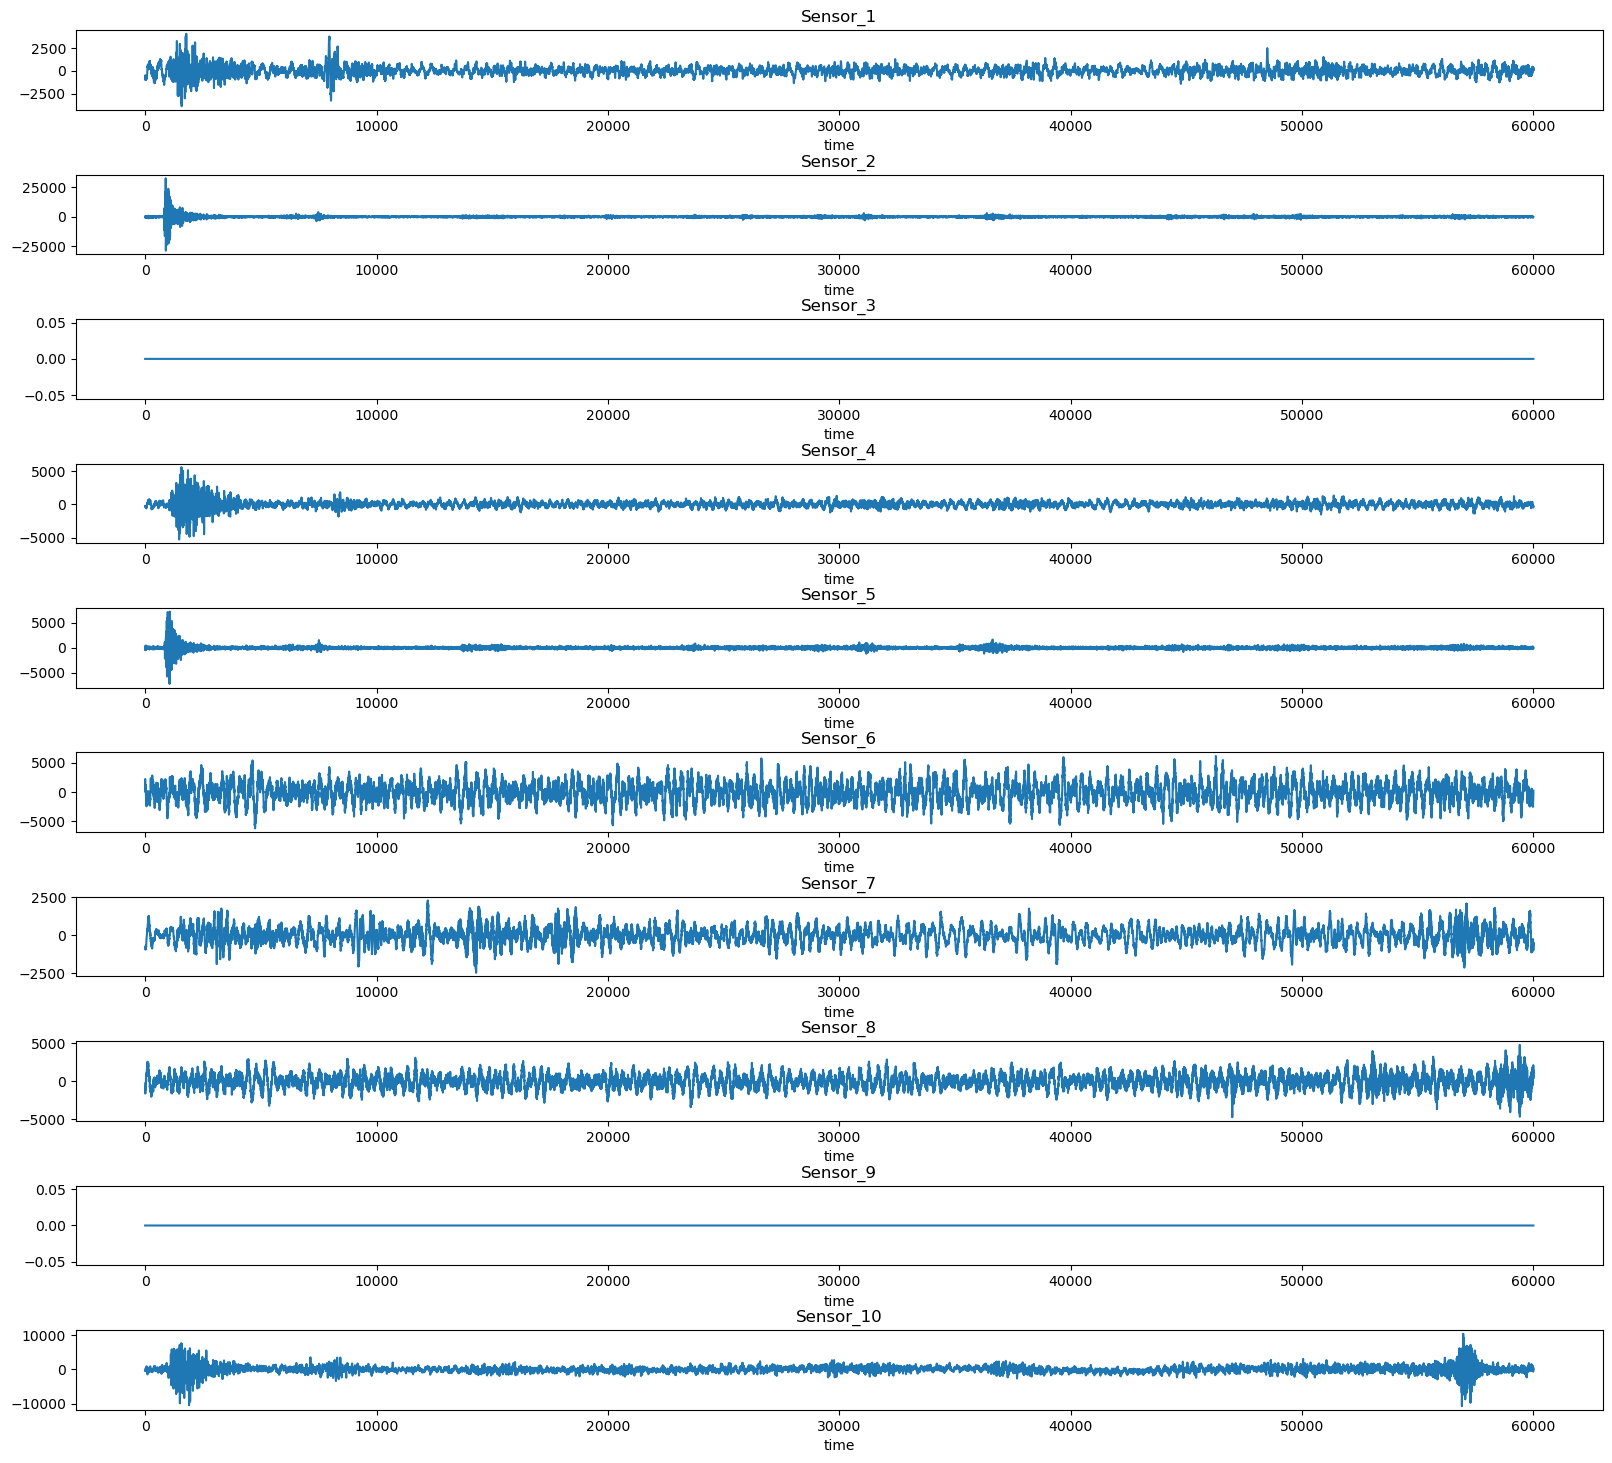

In [104]:
#filling missing values with zeros
show_sensors(sequence.fillna(0))

# 2. Data Analysis - Basic EDA

## Train.csv
- convert`time_to_eruption` to h:m:s(hh:mm:ss)

In [105]:
train

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429
...,...,...
4426,873340274,15695097
4427,1297437712,35659379
4428,694853998,31206935
4429,1886987043,9598270


- 센서 값은 10분 간 `60000`개가 측정됨
- 10분은 600(10 * 60초)초 이므로, 센서 값은 0.01초 간격으로 샘플링됨(단위가 10e-2 초 - centisecond 임)
- `datetime.timedelta` 적용할 때, 위 특성을 적용

In [106]:
train['time_to_eruption'].apply(lambda x:datetime.timedelta(seconds = x/100))

0      1 days 10:03:40.050000
1      3 days 18:56:36.120000
2      1 days 17:34:19.990000
3      3 days 01:31:37.200000
4      3 days 14:18:44.290000
                ...          
4426   1 days 19:35:50.970000
4427   4 days 03:03:13.790000
4428   3 days 14:41:09.350000
4429   1 days 02:39:42.700000
4430   2 days 07:54:49.380000
Name: time_to_eruption, Length: 4431, dtype: timedelta64[ns]

In [107]:
train['hhmmss'] = train['time_to_eruption'].apply(lambda x:datetime.timedelta(seconds = x/100))
train

,segment_id,time_to_eruption,hhmmss
0,1136037770,12262005,1 days 10:03:40.050000
1,1969647810,32739612,3 days 18:56:36.120000
2,1895879680,14965999,1 days 17:34:19.990000
3,2068207140,26469720,3 days 01:31:37.200000
4,192955606,31072429,3 days 14:18:44.290000
...,...,...,...
4426,873340274,15695097,1 days 19:35:50.970000
4427,1297437712,35659379,4 days 03:03:13.790000
4428,694853998,31206935,3 days 14:41:09.350000
4429,1886987043,9598270,1 days 02:39:42.700000


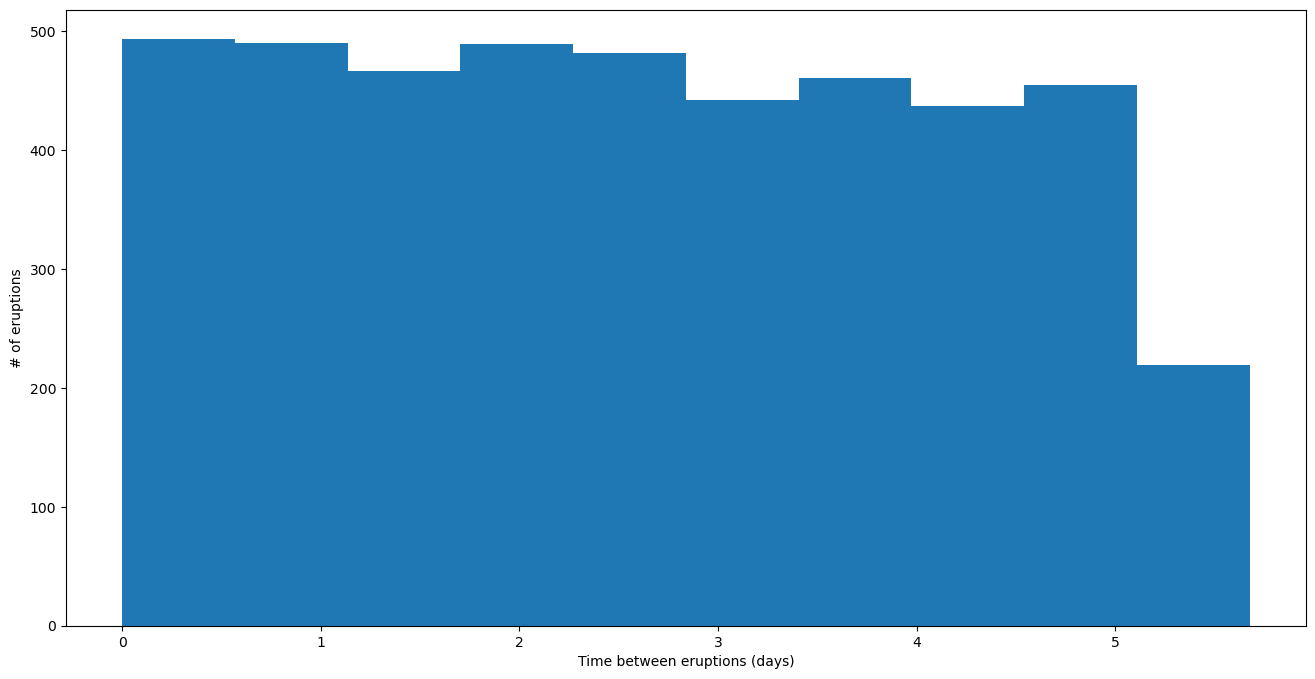

In [108]:
plt.figure(figsize=(16,8))
plt.hist(train['hhmmss'] / pd.Timedelta(days=1))
plt.xlabel('Time between eruptions (days)')
plt.ylabel('# of eruptions');

In [109]:
train['hhmmss']

0      1 days 10:03:40.050000
1      3 days 18:56:36.120000
2      1 days 17:34:19.990000
3      3 days 01:31:37.200000
4      3 days 14:18:44.290000
                ...          
4426   1 days 19:35:50.970000
4427   4 days 03:03:13.790000
4428   3 days 14:41:09.350000
4429   1 days 02:39:42.700000
4430   2 days 07:54:49.380000
Name: hhmmss, Length: 4431, dtype: timedelta64[ns]

<AxesSubplot:>

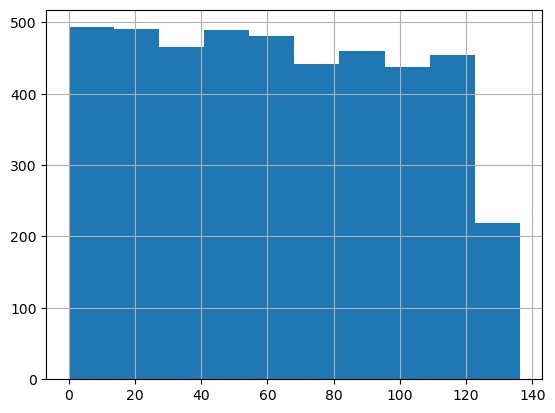

In [110]:
(train['hhmmss'] / pd.Timedelta(hours=1)).hist()

In [111]:
fig = px.histogram(
    train, 
    x="time_to_eruption",
    width=800,
    height=600,
    nbins=10,
    title='Time to eruption distribution'
)

fig.show()

In [112]:
fig = px.line(
    train, 
    y="time_to_eruption",
    width=800,
    height=500,
    title='Time to eruption for all volcanos'
)

fig.show()

## Train & Test 셋 분석

## Train 셋

In [113]:
sensors = set()
observations = set()
nan_columns = list()
missed_groups = list()
for_df = list()

for item in train_csvs:
    name = int(item.split('.')[-2].split('/')[-1])
    at_least_one_missed = 0
    frag = pd.read_csv(item)
    missed_group = list()
    missed_percents = list()
    for col in frag.columns:
        missed_percents.append(frag[col].isnull().sum() / len(frag))
        if pd.isnull(frag[col]).all() == True:
            at_least_one_missed = 1
            nan_columns.append(col)
            missed_group.append(col)
    if len(missed_group) > 0:
        missed_groups.append(missed_group)
    sensors.add(len(frag.columns))
    observations.add(len(frag))
    for_df.append([name, at_least_one_missed] + missed_percents)

In [114]:
print('고유한(Unique) 센서 수: ', sensors)
print('고유한(Unique) 행(row) 수: ', observations)

고유한(Unique) 센서 수:  {10}
고유한(Unique) 행(row) 수:  {60001}


In [115]:
print('센서 값이 비어있는(missed) 센서 수:', len(nan_columns))

absent_sensors = dict()

for item in nan_columns:
    if item in absent_sensors:
        absent_sensors[item] += 1
    else:
        absent_sensors[item] = 0

센서 값이 비어있는(missed) 센서 수: 2519


In [116]:
absent_df = pd.DataFrame(absent_sensors.items(), columns=['Sensor', 'Missed sensors'])

fig = px.bar(
    absent_df, 
    x="Sensor",
    y='Missed sensors',
    width=800,
    height=500,
    title='Number of missed sensors in training dataset'
)

fig.show()

## Test 셋

In [117]:
sensors = set()
observations = set()
nan_columns = list()
missed_groups = list()
for_test_df = list()

for item in test_csvs:
    name = int(item.split('.')[-2].split('/')[-1])
    at_least_one_missed = 0
    frag = pd.read_csv(item)
    missed_group = list()
    missed_percents = list()
    for col in frag.columns:
        missed_percents.append(frag[col].isnull().sum() / len(frag))
        if pd.isnull(frag[col]).all() == True:
            at_least_one_missed = 1
            nan_columns.append(col)
            missed_group.append(col)
    if len(missed_group) > 0:
        missed_groups.append(missed_group)
    sensors.add(len(frag.columns))
    observations.add(len(frag))
    for_test_df.append([name, at_least_one_missed] + missed_percents)

In [118]:
print('고유한(Unique) 센서 수: ', sensors)
print('고유한(Unique) 행(row) 수: ', observations)

고유한(Unique) 센서 수:  {10}
고유한(Unique) 행(row) 수:  {60001}


In [119]:
print('값이 비어있는(missed) 센서 수:', len(nan_columns))

absent_sensors = dict()

for item in nan_columns:
    if item in absent_sensors:
        absent_sensors[item] += 1
    else:
        absent_sensors[item] = 0

값이 비어있는(missed) 센서 수: 5371


In [120]:
absent_df = pd.DataFrame(absent_sensors.items(), columns=['Sensor', 'Missed sensors'])

fig = px.bar(
    absent_df, 
    x="Sensor",
    y='Missed sensors',
    width=800,
    height=500,
    title='Number of missed sensors in test dataset'
)

fig.show()